JP Morgan Quantitative Research Job Simulation ✩₊˚.⋆☾⋆⁺₊✧

Task 1 Analysis

Martha McQuillan, 1/6/2025 - 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


# local functions
import importlib
import task1

import importlib, task1
importlib.reload(task1)
from task1 import compute_log_returns
from task1 import plot_price_over_time
from task1 import rolling_mean_returns
from task1 import rolling_volatility
from task1 import plot_rolling_mean
from task1 import plot_rolling_volatility
from task1 import plot_difference_series


In [20]:
df = pd.read_csv("Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


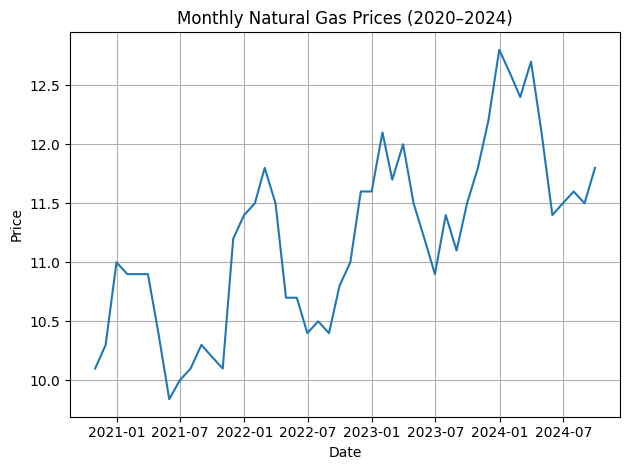

In [21]:
df["Dates"] = pd.to_datetime(df["Dates"], format="mixed")
plot_price_over_time(df)

In [10]:
log_returns = compute_log_returns(df)
df["log_return"] = log_returns
log_returns.head()

0         NaN
1    0.019608
2    0.065751
3   -0.009132
4    0.000000
Name: Prices, dtype: float64

In [11]:
rolling_mean_returns_annual = rolling_mean_returns(df, 12)
rolling_mean_returns_annual.head()

rolling_mean_returns_semiannual = rolling_mean_returns(df, 6)
rolling_mean_returns_semiannual.head()

rolling_mean_returns_quarterly = rolling_mean_returns(df, 3)
rolling_mean_returns_quarterly.head()

df["rm_12"] = rolling_mean_returns(df, 12)
df["rm_6"]  = rolling_mean_returns(df, 6)
df["rm_3"]  = rolling_mean_returns(df, 3)

In [12]:
rolling_volatility_annual = rolling_volatility(df, 12)
rolling_volatility_annual.head()

rolling_volatility_semiannual = rolling_volatility(df, 6)
rolling_volatility_semiannual.head()

rolling_volatility_quarterly = rolling_volatility(df, 3)
rolling_volatility_quarterly.head()

df["vol_12"] = rolling_volatility(df, 12)
df["vol_6"] = rolling_volatility(df, 6)
df["vol_3"] = rolling_volatility(df, 3)

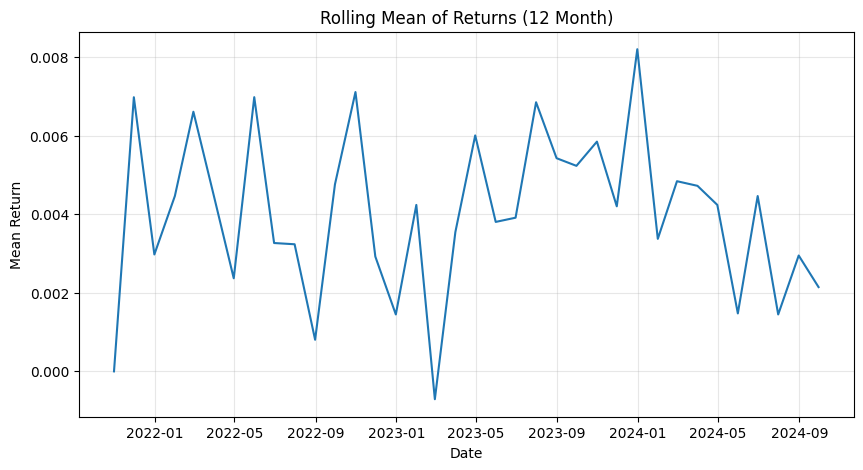

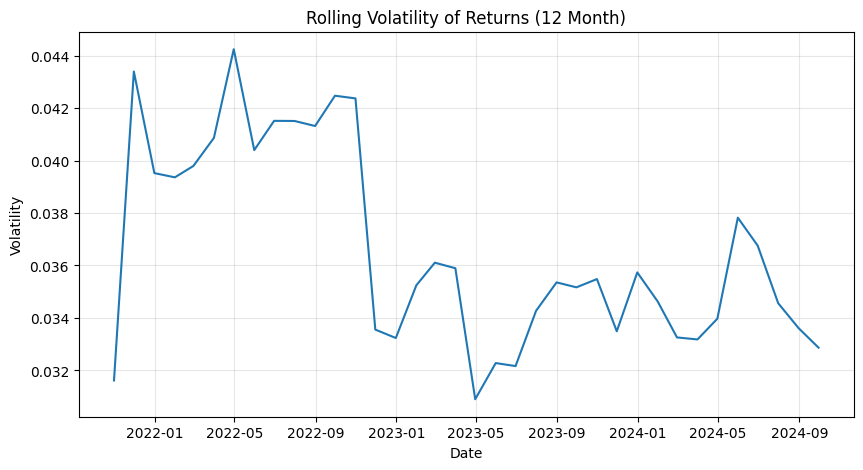

In [13]:
plot_rolling_mean(df)
plot_rolling_volatility(df)

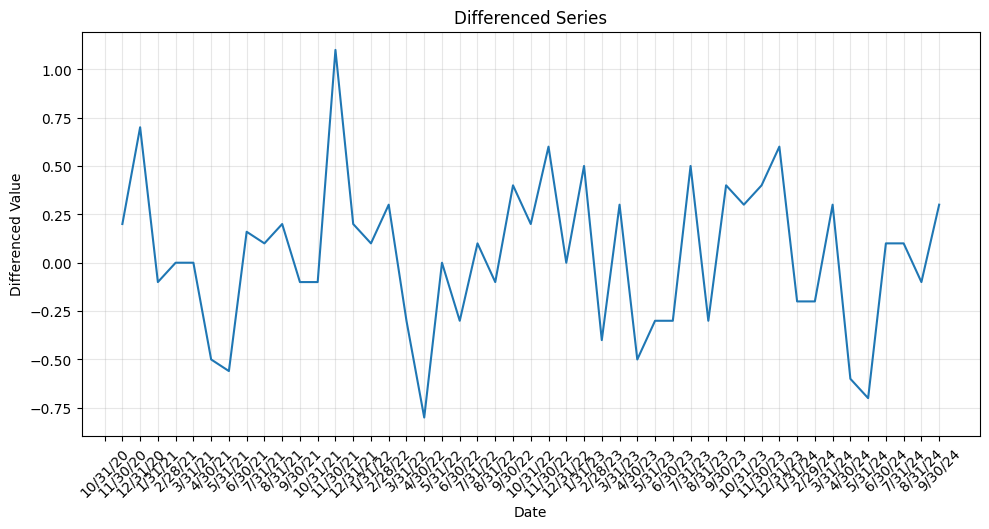

In [41]:
diffed = difference_series(df["Prices"], order=1)
plot_difference_series(df["Dates"], diffed)

Based on the short program below, it can be seen that there are about the same number of differenced values above and below 0, making the choice of D=1 a mathematically valid choice for the SARIMA model. 

In [53]:
count_positive = 0
count_negative = 0
for val in diffed:
    if val > 0:
        count_positive += 1
    elif val <= 0:
        count_negative +=1
print("Number of positive differences =", count_positive)
print("Number of negative differences =", count_negative)

Number of positive differences = 24
Number of negative differences = 23


Based on the graph below, it is evident that there is a seasonal correlation in Average Natural Gas prices, being higher in the winters and lower in the summers, making a resonable choice as D=1.

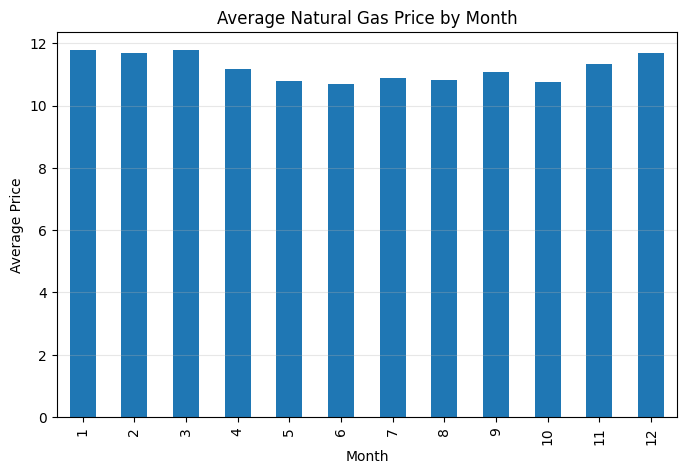

In [55]:
plt.figure(figsize=(8,5))
df.groupby("month")["Prices"].mean().plot(kind="bar")
plt.title("Average Natural Gas Price by Month")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.grid(axis="y", alpha=0.3)
plt.show()

Both ACF and PACF have spikes at lag = 1, meaning that a model fitting q = 1, Q = 1 is a mathematically sound choice. Futhermore, ACF spikes at lag = 12, making p = 1 a good choice, but PACF doesn't spike at lag = 12, making P = 0 the best candiate. 

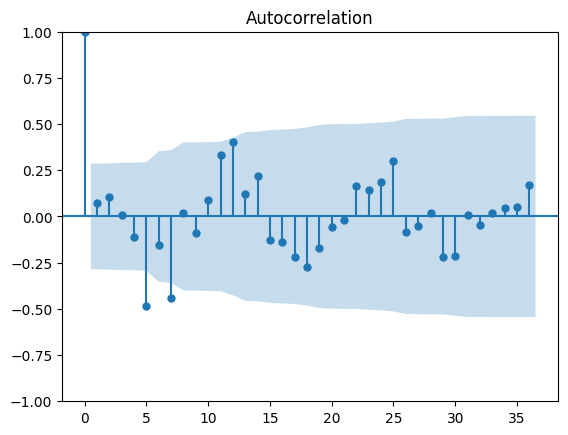

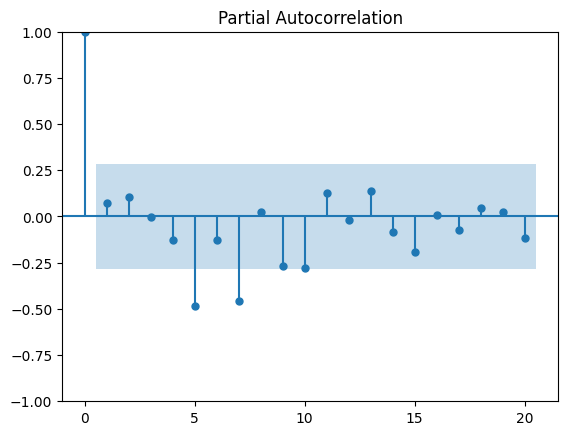

In [67]:
plot_acf(diffed.dropna(), lags=36)
plot_pacf(diffed.dropna(), lags=20);

In [71]:
y = df["Prices"]

model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                   3.050
Date:                            Thu, 08 Jan 2026   AIC                              1.899
Time:                                    18:14:57   BIC                              6.077
Sample:                                         0   HQIC                             2.806
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3767      0.288     -1.308      0.191      -0.941       0.188
ma.L1         -0.5229      0.318   

/Users/marthamcquillan/Documents/jpm-quant-research-sim/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [76]:
y = df["Prices"]

model = SARIMAX(
    y,
    order=(1,1,1),
    seasonal_order=(0,1,0,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit()
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                              Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -4.543
Date:                             Thu, 08 Jan 2026   AIC                             15.085
Time:                                     18:27:00   BIC                             19.575
Sample:                                          0   HQIC                            16.596
                                              - 48                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1906      0.246     -0.775      0.438      -0.673       0.292
ma.L1         -0.6697      

In [74]:
y = df["Prices"]

model = SARIMAX(
    y,
    order=(1,1,0),
    seasonal_order=(0,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit()
print(res.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Prices   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                  -0.771
Date:                              Thu, 08 Jan 2026   AIC                              7.543
Time:                                      18:18:15   BIC                             10.816
Sample:                                           0   HQIC                             8.314
                                               - 48                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6284      0.231     -2.720      0.007      -1.081      -0.176
ma.S.L12      -1.00

/Users/marthamcquillan/Documents/jpm-quant-research-sim/.venv/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
